# Practical Lab 4 - Polynomial Regression, R-Squared, MAPE

## Diabetes Progression Prediction
We will forecast the progress of a person's diabetes using their Body Mass Index (BMI). 

Three distinct techniques will be utilised: Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE), and R-squared. These resources will assist us in determining whether our projections are accurate.

### Step 1: Data Loading and Preparation

In [1]:
# Imported libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

### Step 2: Data Splitting
Next up, we’re going to divide our data into three parts: training, validation, and test sets.

In [2]:
# Set the proportion of data to be used for testing
test_ratio = 0.15

# Spliting the data into training+validation set and testing set
# The test_size parameter determines the proportion of the original data is used for the test set.
# random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)

# Printing the sizes of the training+validation set and testing set
print("Training+Validation set has", X_train_val.shape[0], "samples")
print("Testing set has", X_test.shape[0], "samples")

# Set the proportion of training+validation data to be used for validation
validation_ratio = 0.1765

# Split the training+validation set into training set and validation set
# The test_size parameter determines the proportion of the training+validation data is used for the validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_ratio, random_state=0)

# Print the sizes of the training set and validation set
print("Training set has", X_train.shape[0], "samples")
print("Validation set has", X_val.shape[0], "samples")

Training+Validation set has 375 samples
Testing set has 67 samples
Training set has 308 samples
Validation set has 67 samples


### Step 3: Model Training and Evaluation

   Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE   
0     0.0  0.000000 -0.030825  66.334879  71.679638   62.196817  79.672854  \
1     1.0  0.374855  0.321291  50.708293  56.824170   46.493512  60.289797   
2     2.0  0.374881  0.320653  50.707519  56.852641   46.504275  60.291600   
3     3.0  0.382830  0.295960  49.764597  57.694034   45.633928  60.280509   
4     4.0  0.383330  0.299180  49.780927  57.451857   45.566514  60.050506   
5     5.0  0.383614  0.302827  49.782732  57.256981   45.568188  59.798157   

     Train MSE      Val MSE  
0  6011.354476  6674.396493  
1  3757.965493  4394.510718  
2  3757.813383  4398.642892  
3  3710.027888  4558.525387  
4  3707.022454  4537.676893  
5  3705.311755  4514.068081  
         Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   
count  6.000000  6.000000  6.000000   6.000000   6.000000    6.000000  \
mean   2.500000  0.316585  0.251515  52.846491  59.626554   48.660539   
std    1.870829  0.15514

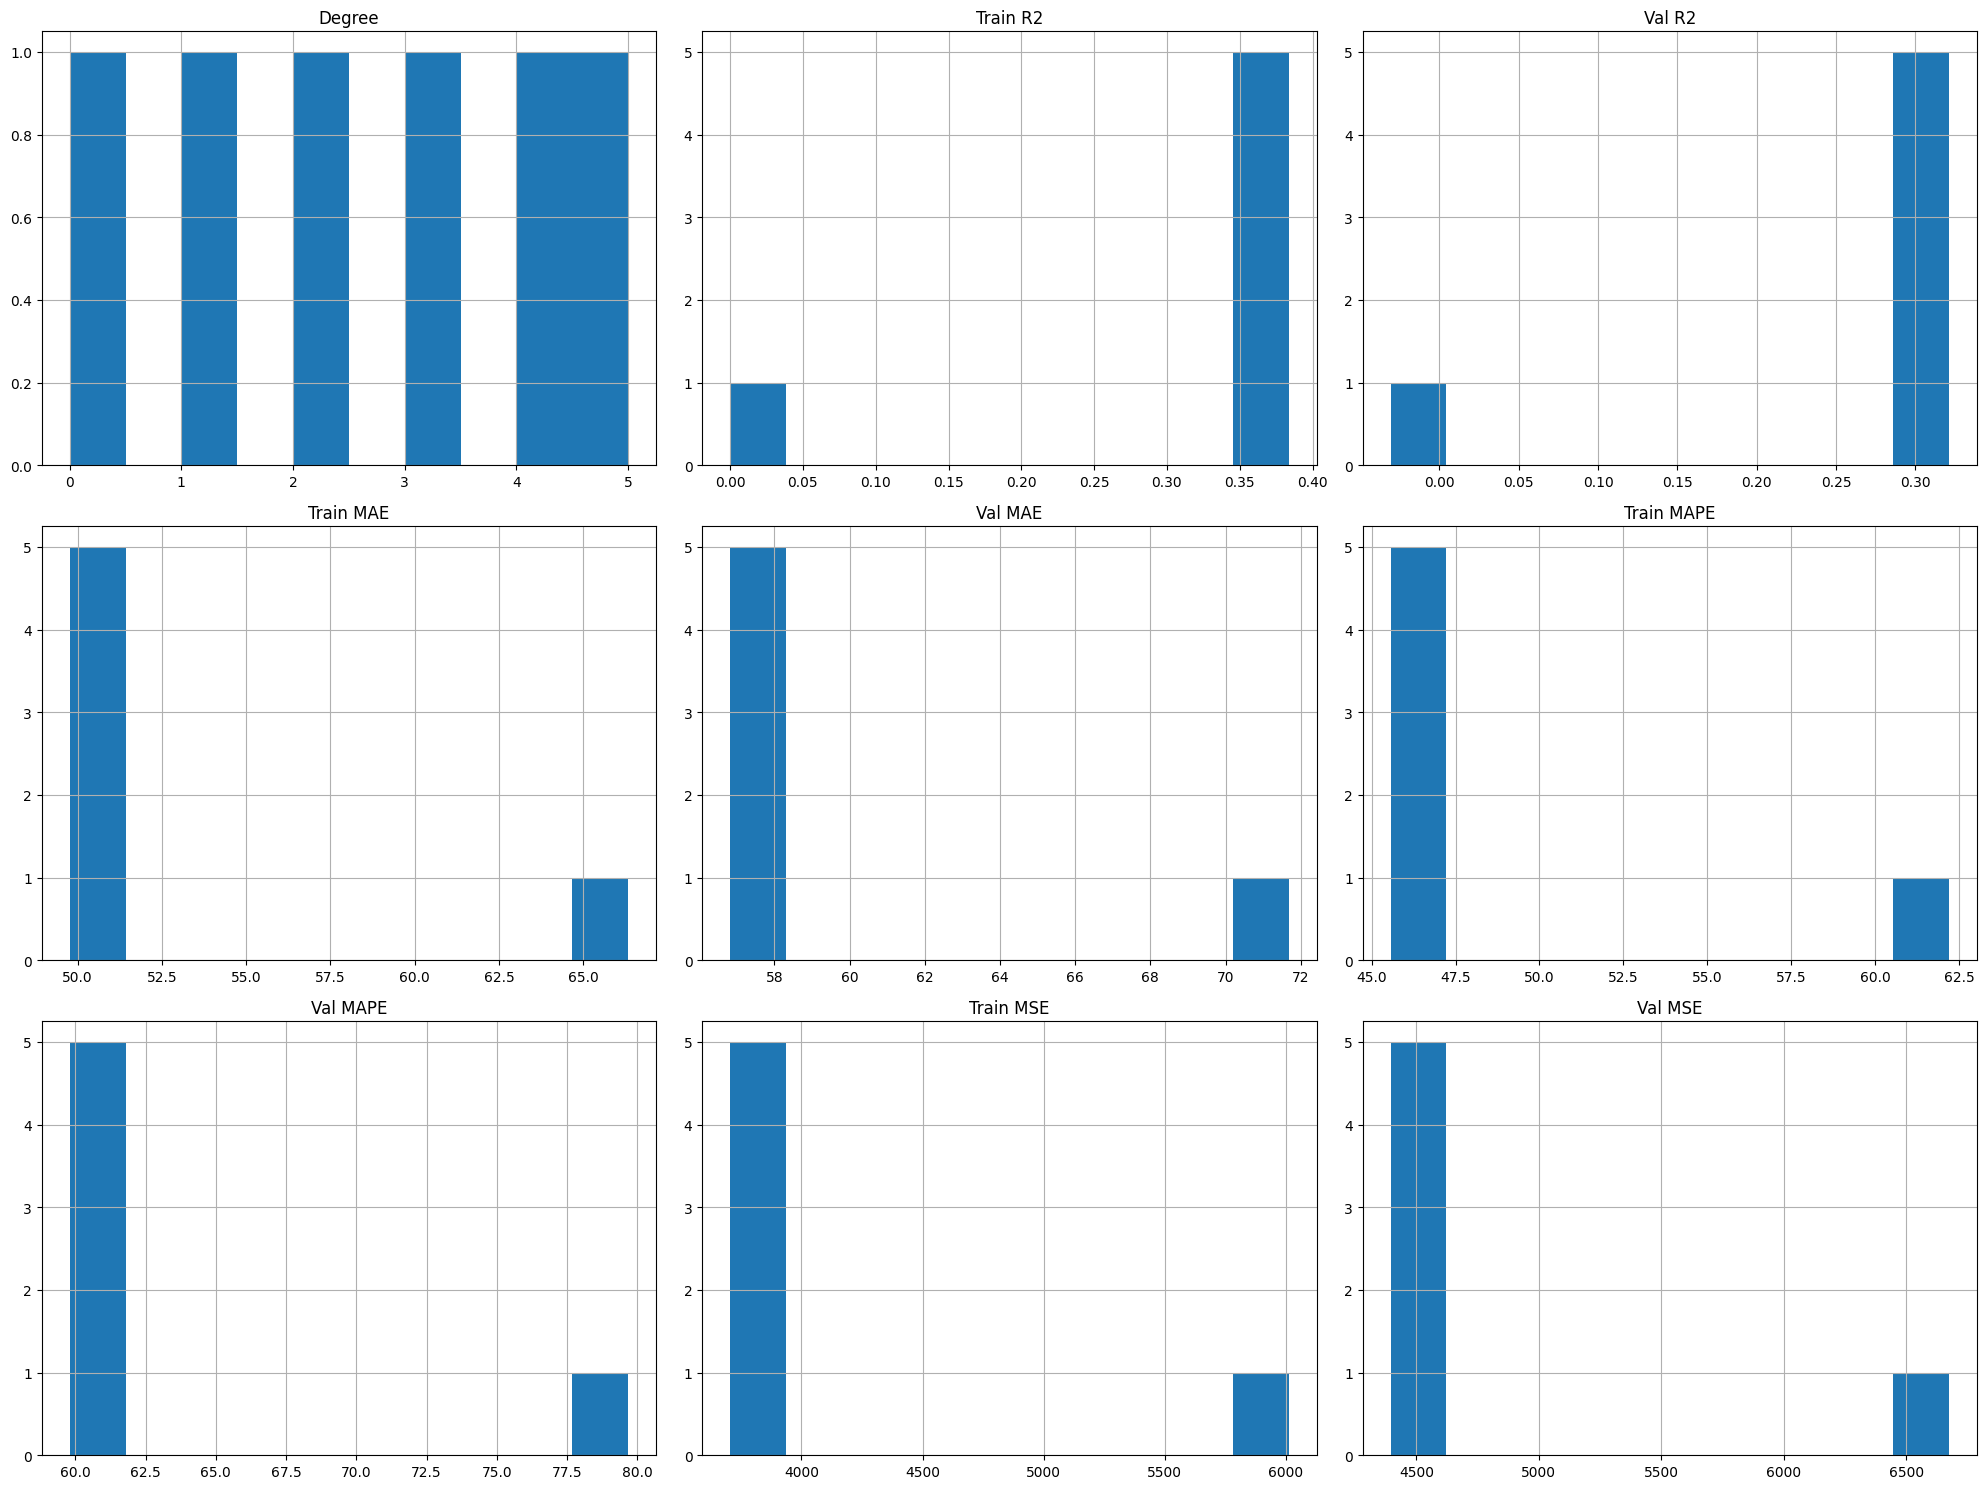

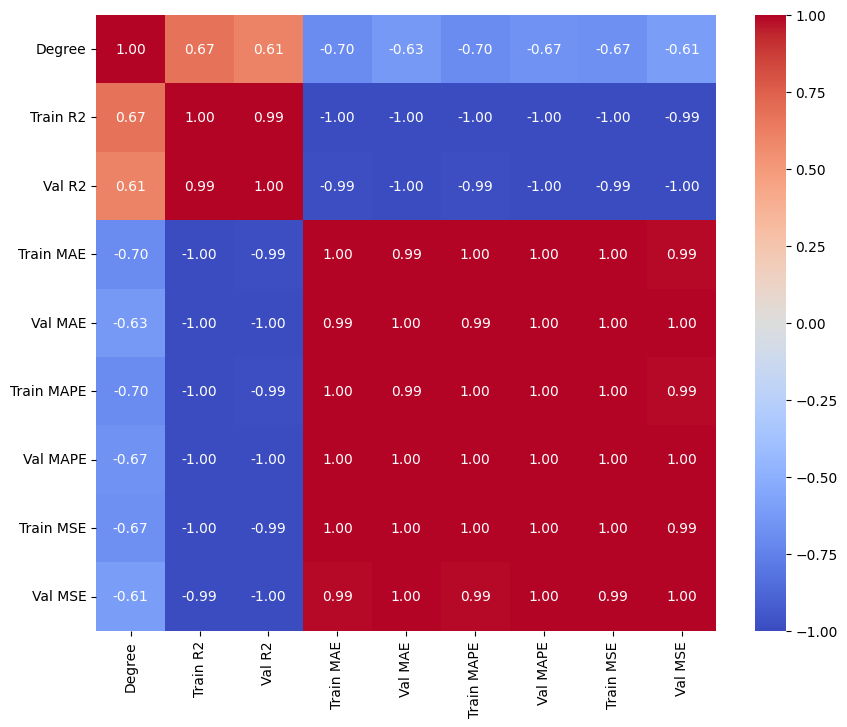

In [3]:
# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    # The error is the absolute difference between the true and predicted values
    # We divide this by the true values to get the percentage error
    # Then we take the mean of these percentage errors over all data points
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Creating a DataFrame to store the results for each degree of the polynomial
# We will store the R2 score, Mean Absolute Error (MAE), and MAPE for both the training and validation data
results = pd.DataFrame(columns=['Degree', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE', 'Train MSE', 'Val MSE'])

# Looping over degrees from 0 to 5
for degree in range(6):
    # Created a PolynomialFeatures object for transforming the input data
    poly = PolynomialFeatures(degree=degree)

    # Transforming the training and validation data
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Created a LinearRegression model
    model = LinearRegression()

    # Trained the model using the transformed training data
    model.fit(X_train_poly, y_train)
    
    # Using the trained model to predict the training and validation data
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Calculated the R2 score for the training and validation data
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Calculated the MAE for the training and validation data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Calculated the Mean Squared Error (MSE) for the training and validation data
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    # Calculated the MAPE for the training and validation data
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Stored the results for this degree in the DataFrame
    results.loc[degree] = [degree, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape, train_mse, val_mse]

# Printing the results
print(results)

# Generated descriptive statistics
print(results.describe())

# Generated histograms for each column
results.hist(bins=10, figsize=(20, 15))
plt.tight_layout()  # This ensures that the plots do not overlap
plt.show()

# Generated a correlation matrix
corr_matrix = results.corr()

# Displaying the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Step 4: Model Selection

In [4]:
# Find the model that gave the lowest MAPE on the validation set
best_model_degree = results['Val MAPE'].idxmin()

# Print the number of the best model
print("The best model is Model", best_model_degree)

# Create a PolynomialFeatures object with the degree of the best model
poly = PolynomialFeatures(degree=best_model_degree)

# Transform the training data using the PolynomialFeatures object
X_train_poly = poly.fit_transform(X_train)

# Create a LinearRegression model
best_model = LinearRegression()

# Train the model using the transformed training data
best_model.fit(X_train_poly, y_train)

# Print a success message
print("The best model has been trained!")

The best model is Model 5
The best model has been trained!


In this instance, our model selection process is guided by the Mean Absolute Percentage Error (MAPE). In statistics, MAPE functions similarly to a measuring tape and aids in determining how accurate our forecasts are. MAPE is computed as follows: * 100 is the mean(abs((Actual - Predicted) / Actual)). This provides us with the average percentage difference between the expected and actual numbers.

Conversely, the R2 (coefficient of determination) is a statistical metric that indicates the extent to which an independent variable or variables in a regression model account for the variation of a dependent variable. Although it's a commonly used statistic for assessing regression models, it's not always the best option.

Similarly, another popular statistic for regression models is Mean Absolute Error (MAE). It is the mean of the absolute deviations between the actual and anticipated values, expressed in the same unit as the output variable, which indicates how inaccurate the forecasts were.

The particular issue at hand and the importance you place on your forecasts will determine which of these measures you use. For example, MAE could be your first choice if you're more concerned with getting the exact answer correct. R2 could be your best option if you're more concerned with accurately predicting the general trend. Perhaps as a result of our increased concern for the relative inaccuracy of the predictions, we determined that MAPE was the best statistic to employ when selecting a model in this instance.


### Step 5: Visualizing the Model

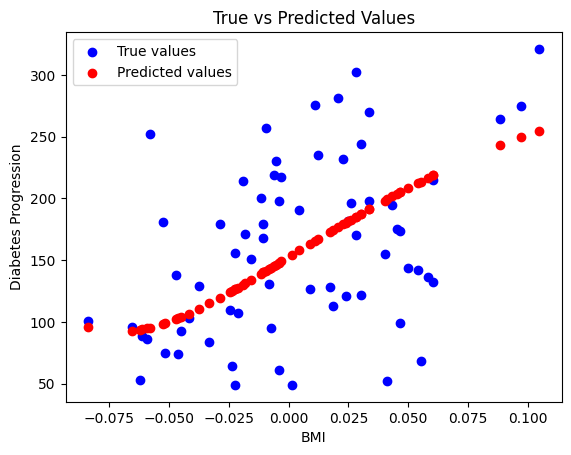

In [5]:
# Transform the test data to polynomial features
X_test_poly = poly.transform(X_test)

# Predicting the test data using the best model
y_test_pred = best_model.predict(X_test_poly)

# Created a scatter plot for the true test values
plt.scatter(X_test, y_test, color='blue', label='True values')

# Added the predicted test values to the same plot
plt.scatter(X_test, y_test_pred, color='red', label='Predicted values')

# Added labels and title
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('True vs Predicted Values')

# Added a legend to differentiate true and predicted values
plt.legend()

# Displaying the plot
plt.show()

### Step 6: Model Interpretation

In [6]:
# Geting the coefficients and intercept from the best model
coef = best_model.coef_
intercept = best_model.intercept_

# Initialized the equation string with the intercept
equation = "y = " + str(intercept)

# Added each coefficient to the equation string
for i in range(len(coef)):
    equation += " + " + str(coef[i]) + " * x^" + str(i)

# Printing the equation of the best model
print(f'Best model equation: {equation}')

# Defined an example BMI value
bmi_value = 0.05

# Transform the BMI value to polynomial features
bmi_value_poly = poly.transform([[bmi_value]])

# Used the best model to predict the expected diabetes progression for the BMI value
expected_progression = best_model.predict(bmi_value_poly)

# Printing the expected diabetes progression for the BMI value
print(f'Expected diabetes progression for BMI={bmi_value}: {expected_progression[0]}')


Best model equation: y = 152.51594386317439 + 0.0 * x^0 + 1186.204249798065 * x^1 + -106.3327512870048 * x^2 + -38695.80605715241 * x^3 + 322126.7808612744 * x^4 + -1220677.341462946 * x^5
Expected diabetes progression for BMI=0.05: 208.35517942889186


### Step 7: Polynomial Regression: Number of Trainable Parameters

In [7]:
# Looping over degrees from 0 to 5
for degree in range(6):
    # Create a PolynomialFeatures object for transforming the input data
    poly = PolynomialFeatures(degree=degree)

    # Transform the training data
    X_train_poly = poly.fit_transform(X_train)

    # Get the feature names
    feature_names = poly.get_feature_names_out(input_features=['x'])

    # The number of trainable parameters is the number of features plus one (for the intercept)
    num_params = len(feature_names) + 1

    print(f'Degree {degree} model has {num_params} trainable parameters: {feature_names} and the intercept')

Degree 0 model has 2 trainable parameters: ['1'] and the intercept
Degree 1 model has 3 trainable parameters: ['1' 'x'] and the intercept
Degree 2 model has 4 trainable parameters: ['1' 'x' 'x^2'] and the intercept
Degree 3 model has 5 trainable parameters: ['1' 'x' 'x^2' 'x^3'] and the intercept
Degree 4 model has 6 trainable parameters: ['1' 'x' 'x^2' 'x^3' 'x^4'] and the intercept
Degree 5 model has 7 trainable parameters: ['1' 'x' 'x^2' 'x^3' 'x^4' 'x^5'] and the intercept


## Conclusion
We have started a comprehensive machine learning journey in this notebook to use BMI to predict the evolution of diabetes. We started by loading and splitting the data, then we trained and validated variously sophisticated polynomial regression models.
Then, using the Mean Absolute Percentage Error (MAPE) to assess the model's performance on the validation set, we selected the best model—our champion. After that, we tested this champion model to the breaking point on the test set and visualised the results.
Ultimately, we were able to decipher the model's equation and apply it to determine the anticipated course of diabetes for a given BMI.

In [8]:
# Calculate the mean absolute error (MAE) for the test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)  # Add this line to define test_r2

# Calculate the mean absolute percentage error (MAPE) for the test data
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the R2 score, MAE, MAPE, and best model equation for the test data
print(f'Test R2: {test_r2}')
print(f'Test MAE: {test_mae}')
print(f'Test MAPE: {test_mape}')
print(f'Best model equation: {equation} == {expected_progression[0]}')

Test R2: 0.13367946966371658
Test MAE: 51.94644861449457
Test MAPE: 42.50644966112318
Best model equation: y = 152.51594386317439 + 0.0 * x^0 + 1186.204249798065 * x^1 + -106.3327512870048 * x^2 + -38695.80605715241 * x^3 + 322126.7808612744 * x^4 + -1220677.341462946 * x^5 == 208.35517942889186
